In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv("ElecDeviceRatingPrediction.csv")
electro = df.copy()
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Pentium Quad,Not Available,4 GB,LPDDR4X,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,45990,3 stars,0,0
1,ASUS,Intel,Core i5,10th,8 GB,LPDDR4,0 GB,512 GB,32-bit DOS,4 GB,Casual,No warranty,No,No,106167,4 stars,1881,241
2,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,64-bit Windows,0 GB,Casual,No warranty,No,No,22990,3 stars,0,0
3,Lenovo,Intel,Core i3,11th,4 GB,DDR4,256 GB,0 GB,64-bit Windows,0 GB,Casual,1 year,No,Yes,44990,4 stars,42,4
4,HP,AMD,Ryzen 7,Not Available,16 GB,DDR4,512 GB,0 GB,64-bit Windows,2 GB,Casual,1 year,No,Yes,79990,3 stars,23,6


In [411]:
#check the datatypes
electro.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [412]:
#convert to the correct datatype
electro['Touchscreen']=electro['Touchscreen'].astype('category')
electro['msoffice']=electro['msoffice'].astype('category')
electro['rating']=electro['rating'].str.strip('stars')
electro['rating']=electro['rating'].astype('category')
electro['ram_gb']=electro['ram_gb'].str.strip('GB')
electro['ram_gb']=electro['ram_gb'].astype('int')
electro['ssd']=electro['ssd'].str.strip('GB')
electro['ssd']=electro['ssd'].astype('int')
electro['hdd']=electro['hdd'].str.strip('GB')
electro['hdd']=electro['hdd'].astype('int')


In [413]:
electro['graphic_card_gb']=electro['graphic_card_gb'].str.strip('GB')
electro['graphic_card_gb']=electro['graphic_card_gb'].astype('int')

In [414]:
electro['warranty']=electro['warranty'].str.strip('year || years')
electro['warranty']=electro['warranty'].str.replace('No warrant','0')
electro['warranty']=electro['warranty'].astype('int')

In [415]:
electro['processor_gnrtn']=electro['processor_gnrtn'].str.strip('th')
electro['processor_gnrtn']=electro['processor_gnrtn'].str.replace('Not Available','0')


In [416]:
electro[['hdd', 'ssd' , 'rating' ,'ram_gb','graphic_card_gb','warranty','processor_gnrtn']]

,hdd,ssd,rating,ram_gb,graphic_card_gb,warranty,processor_gnrtn
0,512,0,3,4,0,0,0
1,512,0,4,8,4,0,10
2,512,0,3,4,0,0,0
3,0,256,4,4,0,1,11
4,0,512,3,16,2,1,0
...,...,...,...,...,...,...,...
718,0,256,4,4,0,0,11
719,0,512,3,8,0,0,11
720,0,512,4,8,0,3,11
721,512,0,4,8,8,0,10


In [417]:
electro.dtypes

brand                  object
processor_brand        object
processor_name         object
processor_gnrtn        object
ram_gb                  int32
ram_type               object
ssd                     int32
hdd                     int32
os                     object
graphic_card_gb         int32
weight                 object
warranty                int32
Touchscreen          category
msoffice             category
Price                   int64
rating               category
Number of Ratings       int64
Number of Reviews       int64
dtype: object

In [418]:
#check the ranges
electro.describe()

,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,8.724758,449.150761,232.984786,1.208852,0.716459,77031.348548,301.217151,36.550484
std,4.439221,318.015040,416.286290,2.053125,0.605691,45706.444883,970.519221,115.413126
min,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,0.000000,45960.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,17.000000,2.000000
75%,8.000000,512.000000,512.000000,2.000000,1.000000,89846.000000,154.000000,19.500000
max,32.000000,3072.000000,2048.000000,8.000000,3.000000,441990.000000,15279.000000,1947.000000


In [419]:

electro['processor_gnrtn'].unique()

array(['0', '10', '11', '8', '7', '12', '9', '4'], dtype=object)

In [420]:
electro.loc[electro['processor_gnrtn'] == '0' , 'processor_gnrtn'] = electro['processor_gnrtn'].value_counts().idxmax()

In [421]:
electro['processor_gnrtn']=electro['processor_gnrtn'].astype('category')

In [422]:
electro['processor_gnrtn'].unique()

['11', '10', '8', '7', '12', '9', '4']
Categories (7, object): ['10', '11', '12', '4', '7', '8', '9']

In [423]:
electro['rating'].unique()

['3 ', '4 ', '5 ', '2 ', '1 ']
Categories (5, object): ['1 ', '2 ', '3 ', '4 ', '5 ']

In [424]:
#check for duplicates
duplicates = electro.duplicated(keep=False)
duplicates.sum()

30

In [425]:
electro.drop_duplicates(inplace=True)

In [426]:
duplicates = electro.duplicated(keep=False).sum()
duplicates

0

In [427]:
electro[(electro['processor_gnrtn']=='0') & (electro['ssd']==0) & (electro['hdd']==0)]

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews


In [428]:
#check missing data
electro.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

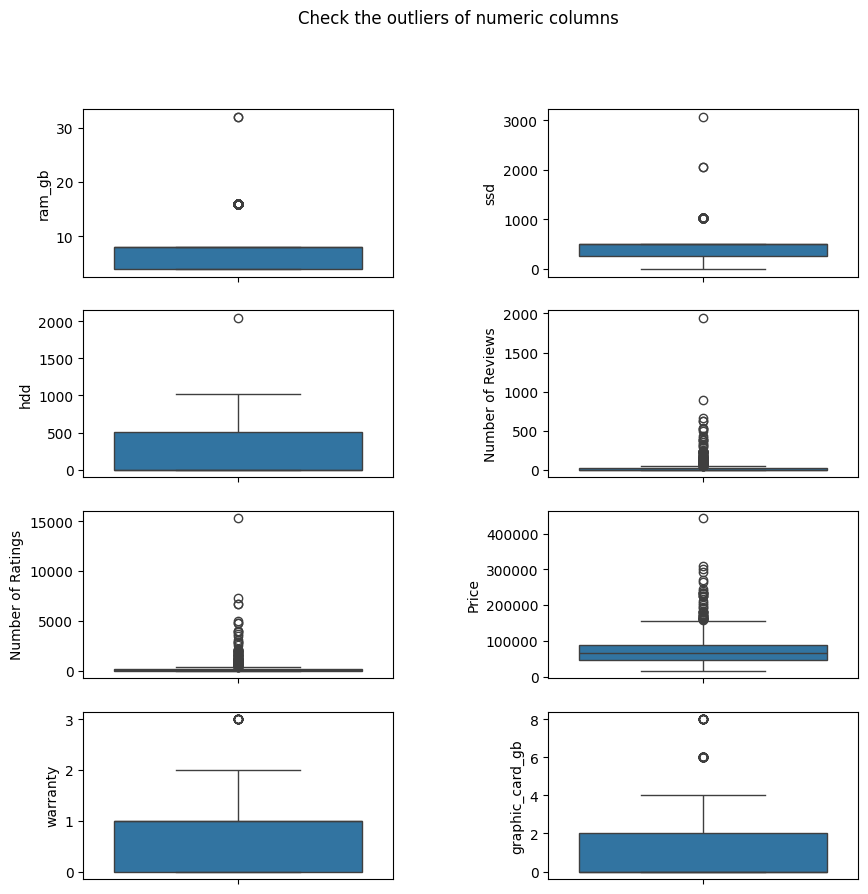

In [429]:

fig, axes = plt.subplots(4,2,sharex=True,figsize=(10, 10))
fig.suptitle('Check the outliers of numeric columns')
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data=electro, y='ram_gb', ax=axes[0,0])
sns.boxplot(data=electro, y='ssd', ax=axes[0,1])
sns.boxplot(data=electro, y='hdd', ax=axes[1,0])
sns.boxplot(data=electro, y='Number of Reviews', ax=axes[1,1])
sns.boxplot(data=electro, y='Number of Ratings', ax=axes[2,0])
sns.boxplot(data=electro, y='Price', ax=axes[2,1])
sns.boxplot(data=electro, y='warranty', ax=axes[3,0])
sns.boxplot(data=electro, y='graphic_card_gb', ax=axes[3,1])
plt.show()

In [430]:
numeric = electro[['ram_gb', 'ssd','hdd','graphic_card_gb','warranty','Price','Number of Ratings','Number of Reviews']]
for n in numeric:
    electro[n]=electro[n].astype('float')
    q75 = electro[n].quantile(0.75)
    q25 = electro[n].quantile(0.25)
    iqr = q75 - q25
    electro.loc[electro[n] > q75 + 1.5 * iqr , n] = q75 + 1.5 * iqr
    electro.loc[electro[n] < q25 - 1.5 * iqr , n] = q25 - 1.5 * iqr


In [432]:
electro.describe()

,ram_gb,ssd,hdd,graphic_card_gb,warranty,Price,Number of Ratings,Number of Reviews
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,8.229462,428.237960,235.331445,1.128895,0.713173,73822.991501,99.922805,12.864377
std,3.544014,261.908392,414.966044,1.807498,0.575095,35287.247989,144.405461,18.577401
min,4.000000,0.000000,0.000000,0.000000,0.000000,16990.000000,0.000000,0.000000
25%,4.000000,256.000000,0.000000,0.000000,0.000000,45600.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,0.000000,1.000000,64990.000000,17.000000,2.000000
75%,8.000000,512.000000,512.000000,2.000000,1.000000,89918.000000,154.500000,19.750000
max,14.000000,896.000000,1280.000000,5.000000,2.500000,156395.000000,386.250000,49.375000


In [433]:
#one hot encoding
electro = pd.get_dummies(electro, columns = ['msoffice','Touchscreen'])

In [435]:
electro.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,graphic_card_gb,weight,warranty,Price,rating,Number of Ratings,Number of Reviews,msoffice_No,msoffice_Yes,Touchscreen_No,Touchscreen_Yes
0,ASUS,Intel,Pentium Quad,11,4.0,LPDDR4X,0.0,512.0,64-bit Windows,0.0,Casual,0.0,45990.0,3,0.00,0.000,True,False,True,False
1,ASUS,Intel,Core i5,10,8.0,LPDDR4,0.0,512.0,32-bit DOS,4.0,Casual,0.0,106167.0,4,386.25,49.375,True,False,True,False
2,ASUS,Intel,Celeron Dual,11,4.0,DDR4,0.0,512.0,64-bit Windows,0.0,Casual,0.0,22990.0,3,0.00,0.000,True,False,True,False
3,Lenovo,Intel,Core i3,11,4.0,DDR4,256.0,0.0,64-bit Windows,0.0,Casual,1.0,44990.0,4,42.00,4.000,False,True,True,False
4,HP,AMD,Ryzen 7,11,14.0,DDR4,512.0,0.0,64-bit Windows,2.0,Casual,1.0,79990.0,3,23.00,6.000,False,True,True,False
